# ***Yulu - Business Case***
---

**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')


**Set Style and palette**

In [2]:
sns.set_palette('pastel')
sns.set_style('whitegrid')

**Import Dataset**

In [3]:
df = pd.read_csv("../bike_sharing.csv")
df.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

**Observe basic Metrics**

In [4]:
# Statistical summary
df.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
df.shape

(10886, 12)

# ***Data Preprocessing***
---

**Change datatype of categorical features**

In [7]:
cat_cols = ['season', 'holiday', 'workingday', 'weather']
for i in cat_cols:
    df[i] = df[i].astype('category')

**Create granular datetime features**

In [8]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [9]:
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['year'] = df['datetime'].dt.year
df['month-year'] = df['datetime'].dt.strftime('%m-%Y')
df['month-year'] = pd.to_datetime(df['month-year'], format='%m-%Y')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  month       10886 non-null  int64         
 13  day         10886 non-null  int64         
 14  year        10886 non-null  int64         
 15  month-year  10886 non-null  datetime64[ns]
dtypes: category(4), dateti

# ***Univariate Analysis***
---

## **Categorical Variables**

In [11]:
for i in cat_cols:
    print(df[i].value_counts(normalize=True))
    print('-'*50)

4    0.251148
2    0.251056
3    0.251056
1    0.246739
Name: season, dtype: float64
--------------------------------------------------
0    0.971431
1    0.028569
Name: holiday, dtype: float64
--------------------------------------------------
1    0.680875
0    0.319125
Name: workingday, dtype: float64
--------------------------------------------------
1    0.660665
2    0.260334
3    0.078909
4    0.000092
Name: weather, dtype: float64
--------------------------------------------------


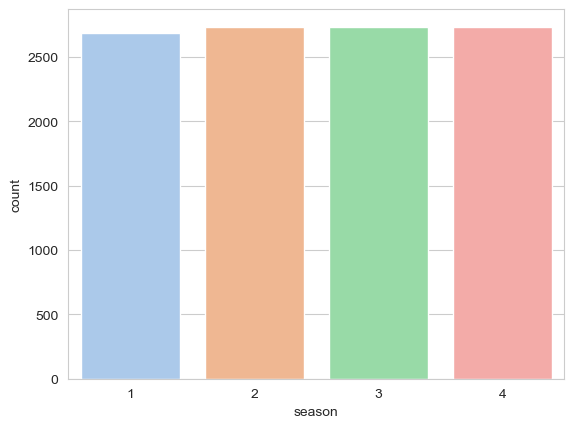

--------------------------------------------------


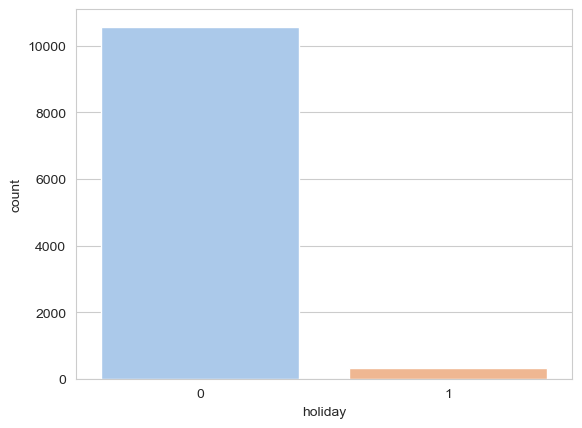

--------------------------------------------------


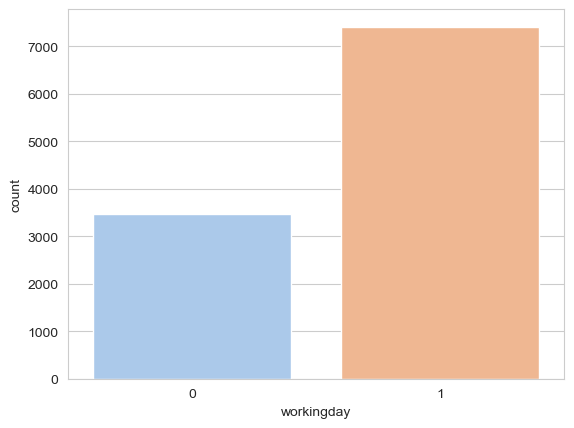

--------------------------------------------------


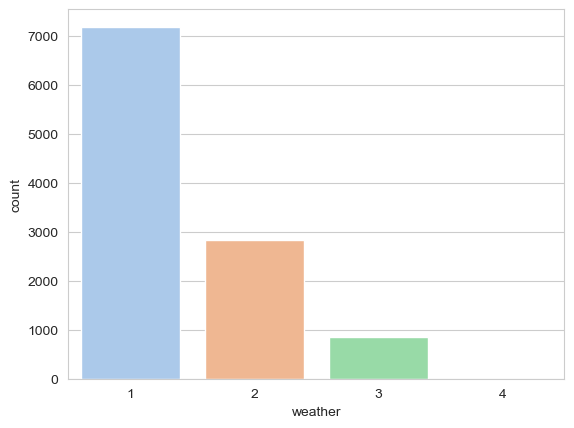

--------------------------------------------------


In [12]:
for i in cat_cols:
    sns.countplot(x=df[i])
    plt.show()
    print('-'*50)

***Observations*** 

1. Bookings are approximately equal across seasons
2. ~>90% bookings are not on a holiday
3. Bookings are approximately 2X on a working day than a non working day
4. There is a decline of bookings from weather 1 through 4

## **Continuous Variables**

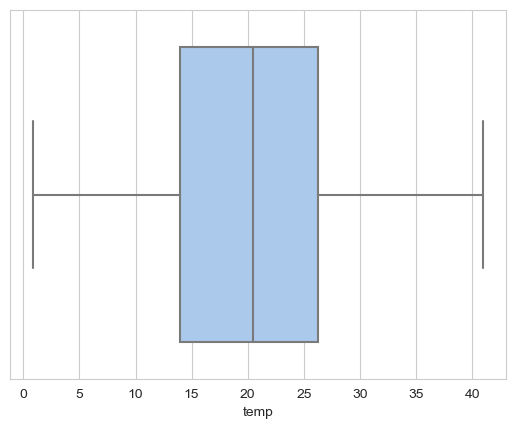

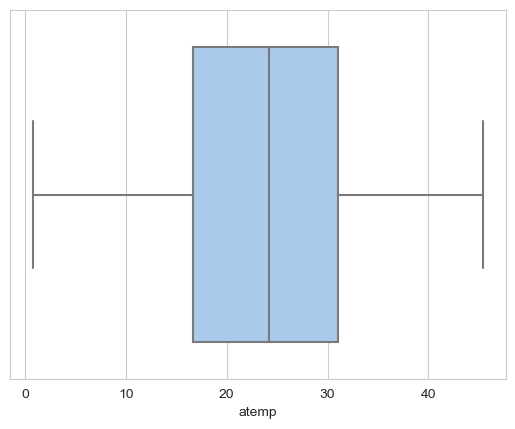

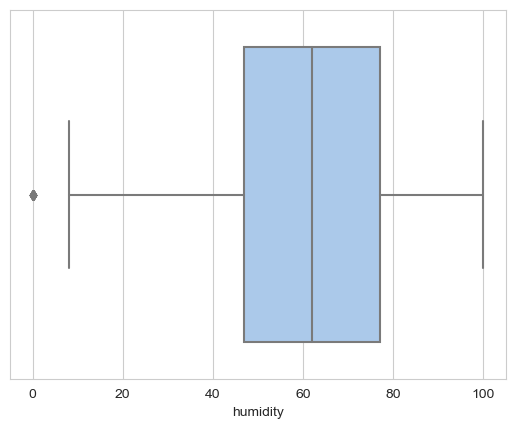

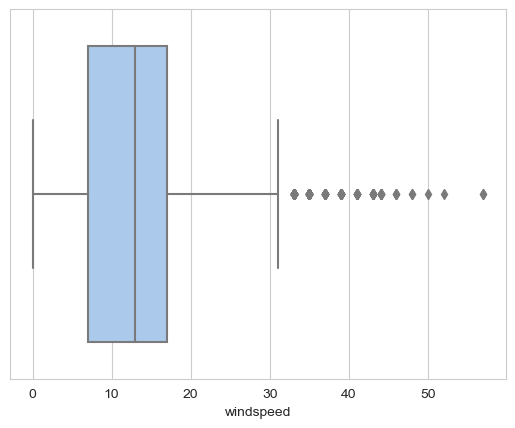

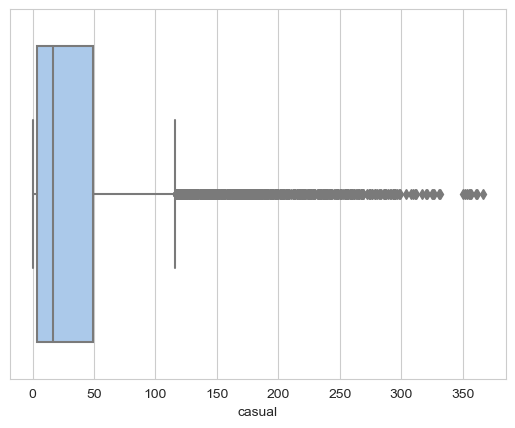

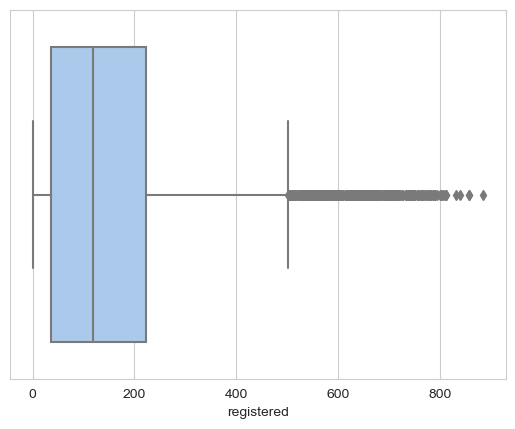

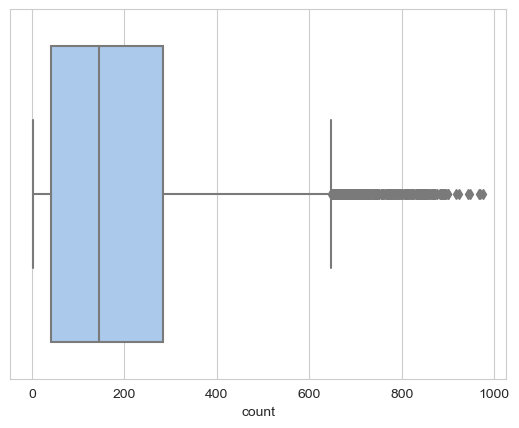

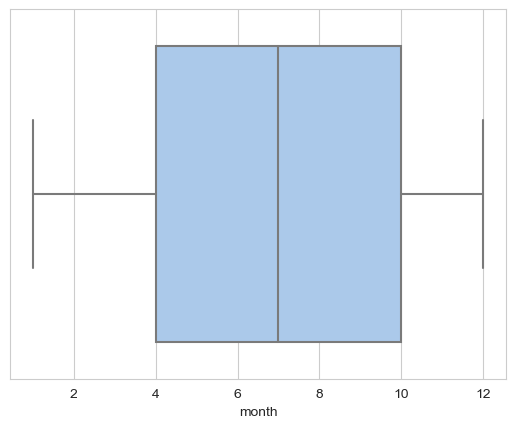

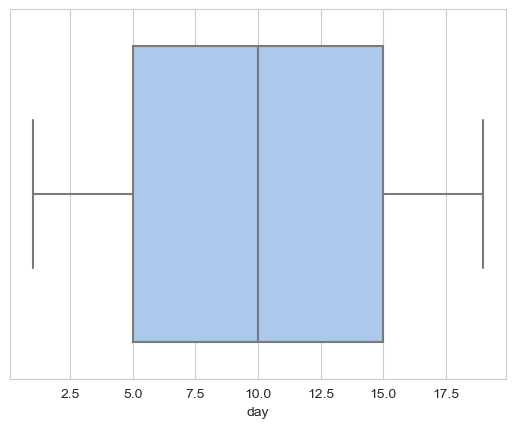

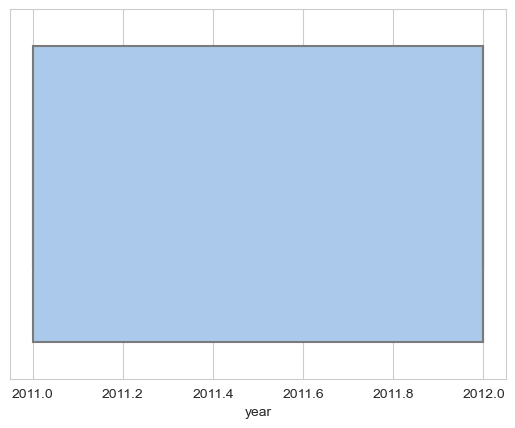

In [13]:
for i in df.columns:
    if df[i].dtype in ['int64', 'float64']:
        sns.boxplot(data=df, x=i,)
        plt.show()

# ***Multivariate Analysis***
---

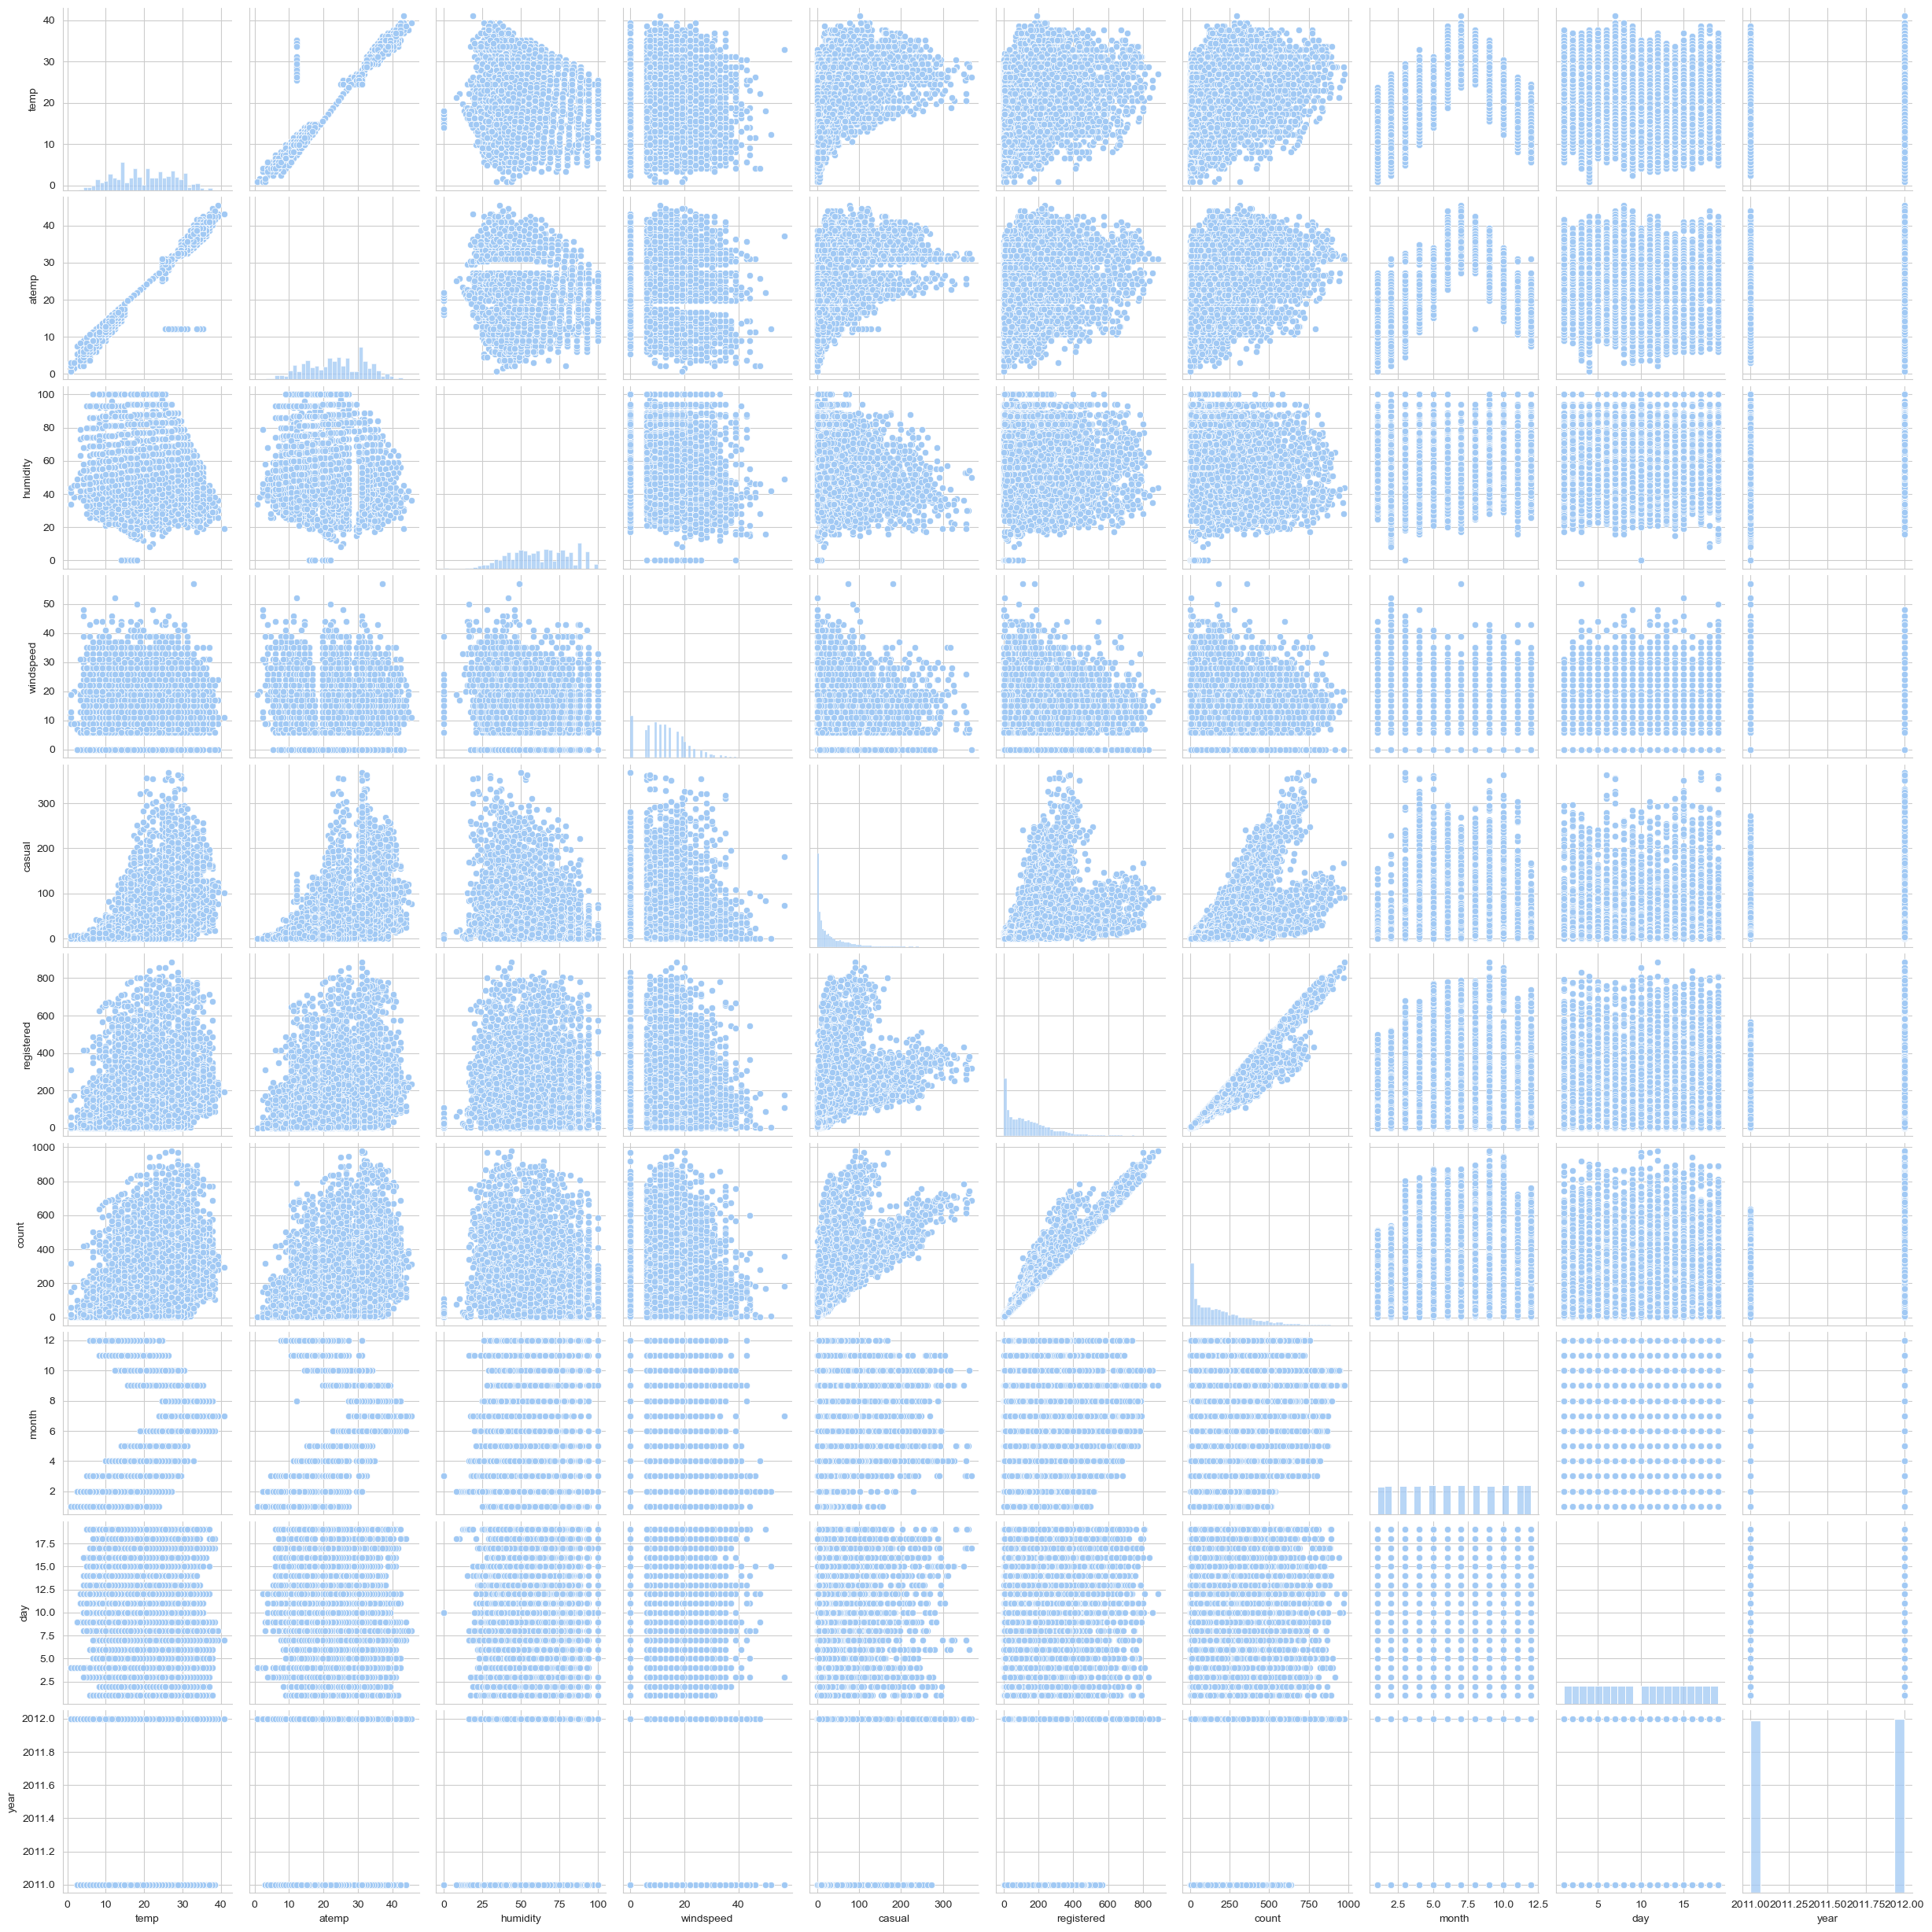

In [14]:
sns.pairplot(df)
plt.show()

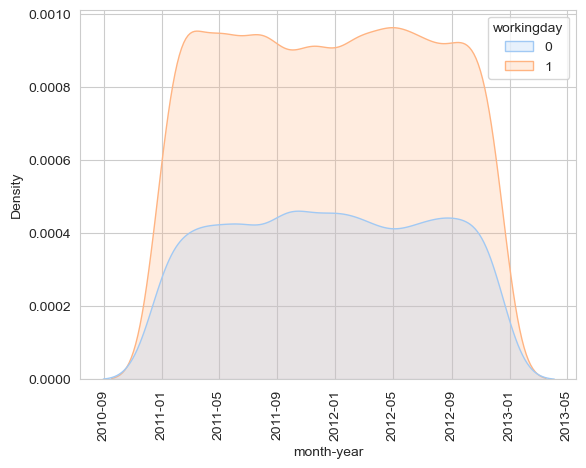

In [15]:
sns.kdeplot(data=df, x='month-year', hue='workingday', fill=True)
plt.xticks(rotation=90)
plt.show()

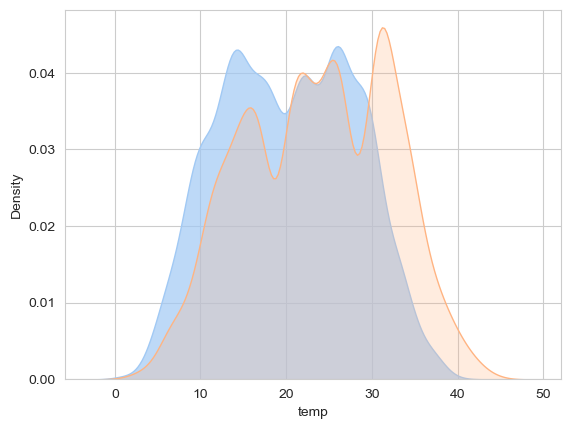

In [16]:
sns.kdeplot(x='temp', data=df, fill=True, alpha=0.7)
sns.kdeplot(x='atemp', data=df, fill=True)
plt.show()

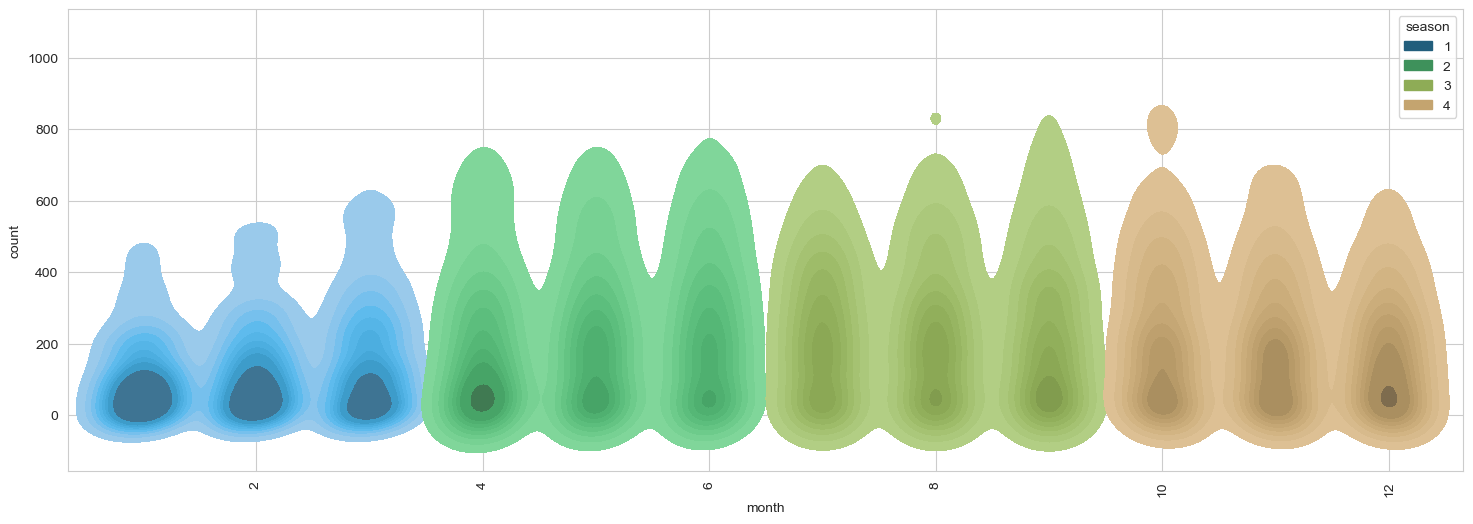

In [17]:
plt.figure(figsize=(18, 6))
sns.kdeplot(x='month', y='count', hue='season', data=df, fill=True, palette='gist_earth')
plt.xticks(rotation=90)
plt.show()

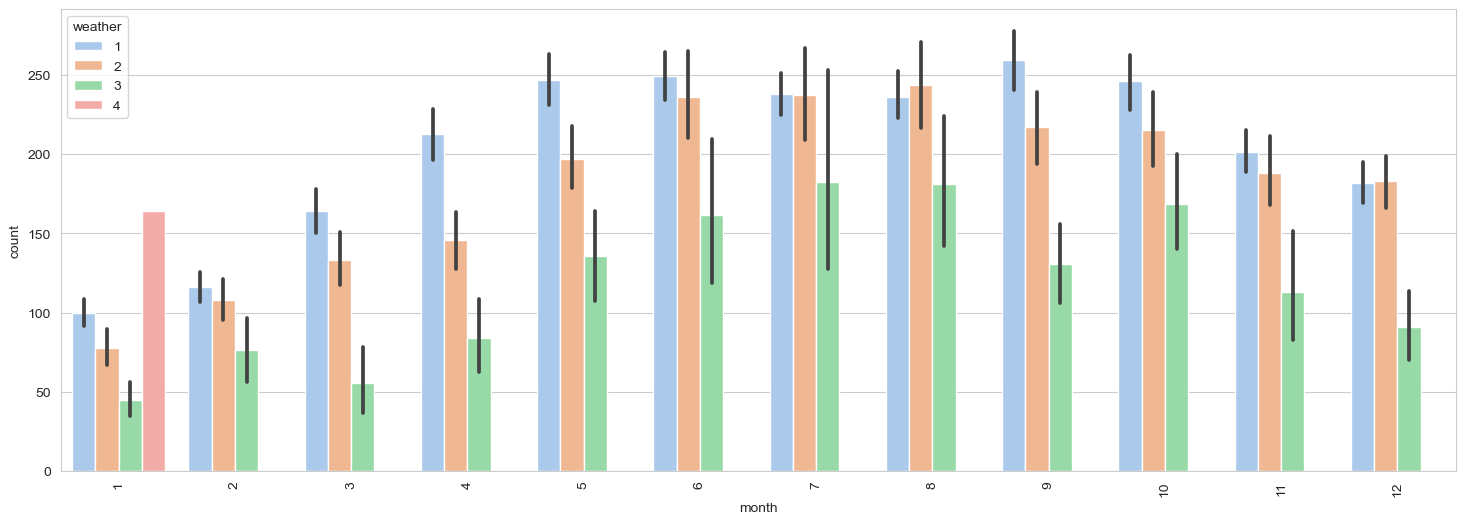

In [18]:
plt.figure(figsize=(18, 6))  
sns.barplot(x='month', y='count', hue='weather', data=df, fill=True)
plt.xticks(rotation=90)
plt.show()

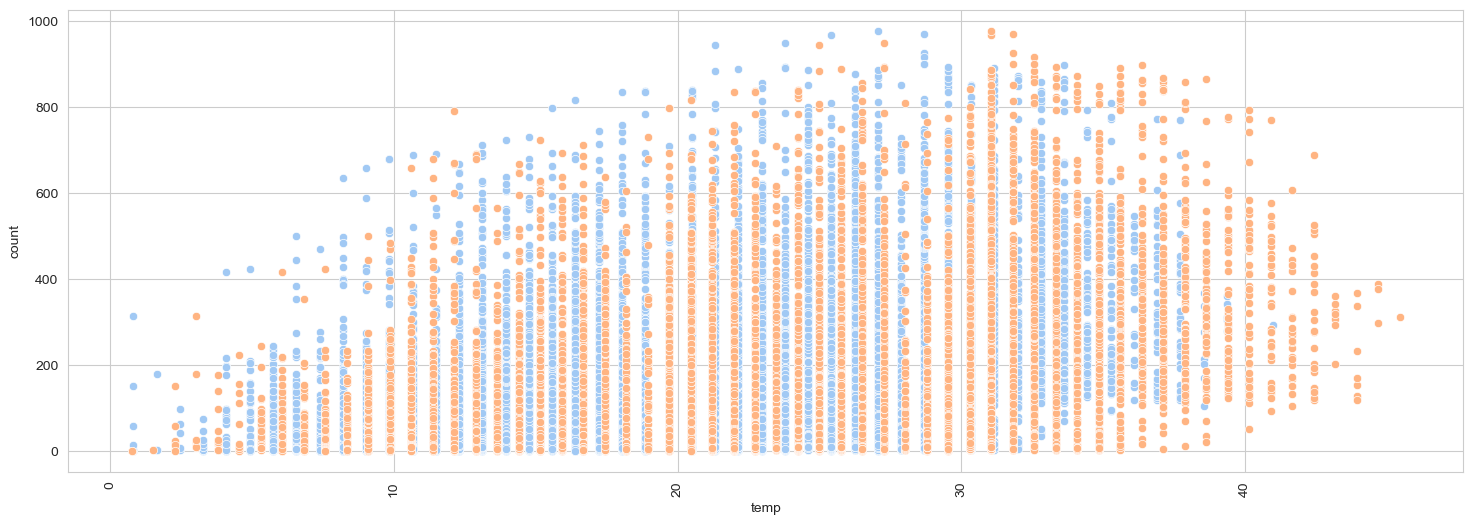

In [19]:
plt.figure(figsize=(18, 6))  
sns.scatterplot(x='temp', y='count', data=df)
sns.scatterplot(x='atemp', y='count', data=df)
plt.xticks(rotation=90)
plt.show()

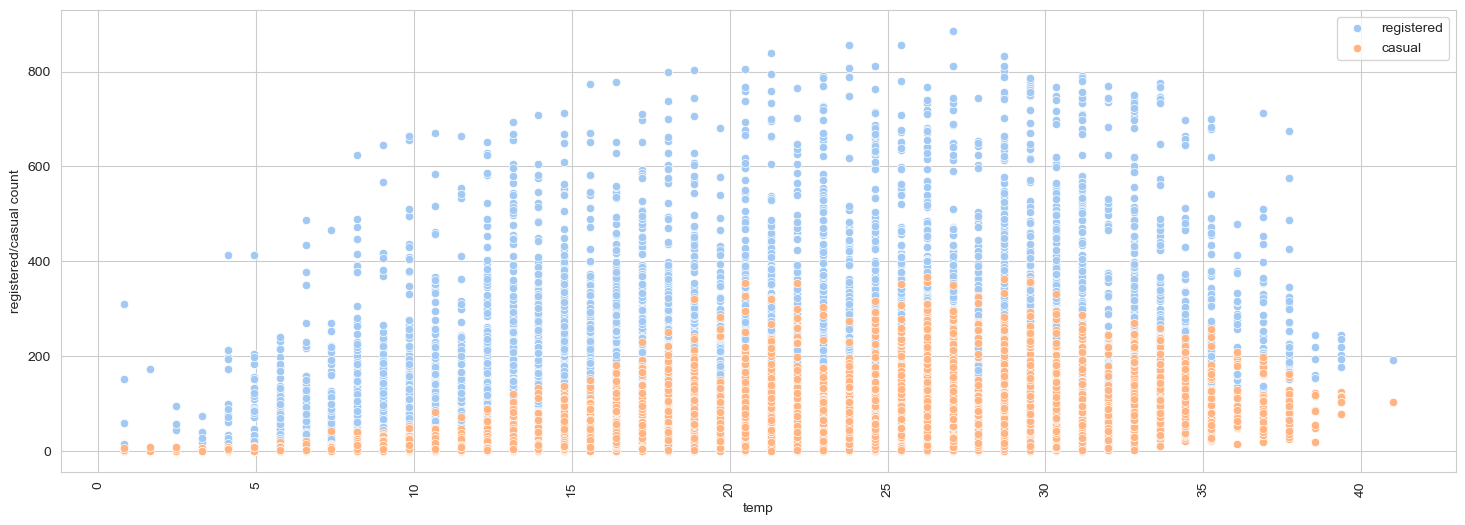

In [20]:
plt.figure(figsize=(18, 6))  
sns.scatterplot(x='temp', y='registered', data=df)
sns.scatterplot(x='temp', y='casual', data=df)
plt.legend(['registered', 'casual'])
plt.ylabel('registered/casual count')
plt.xticks(rotation=90)
plt.show()

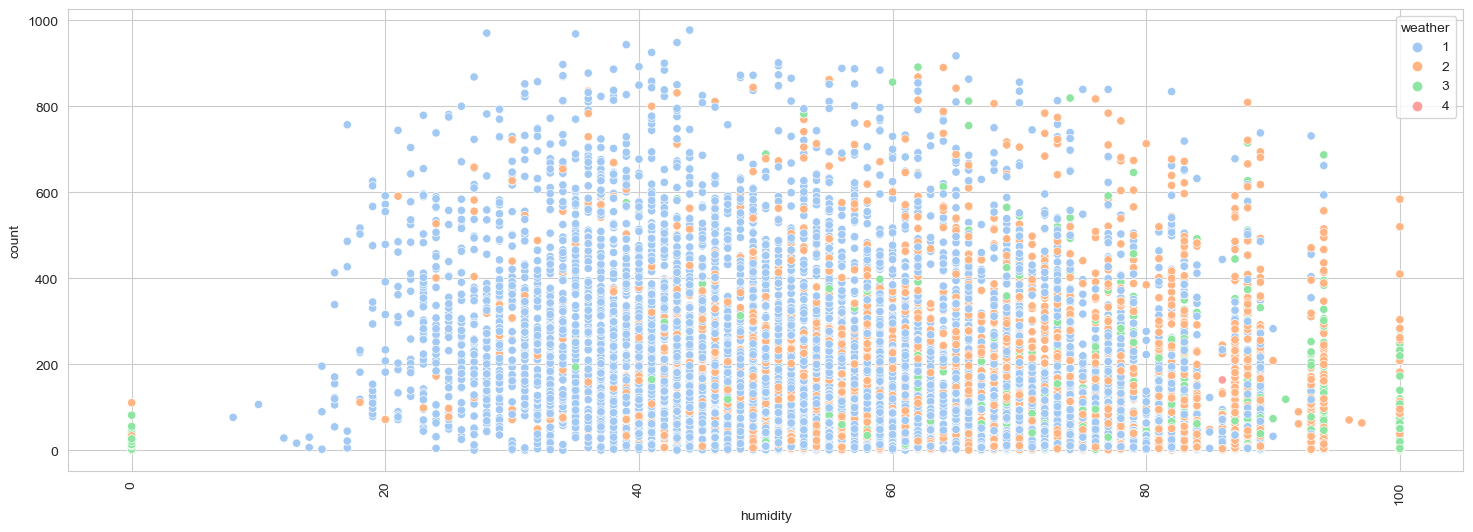

In [21]:
plt.figure(figsize=(18, 6))  
sns.scatterplot(x='humidity', y='count', hue='weather', data=df)
plt.xticks(rotation=90)
plt.show()

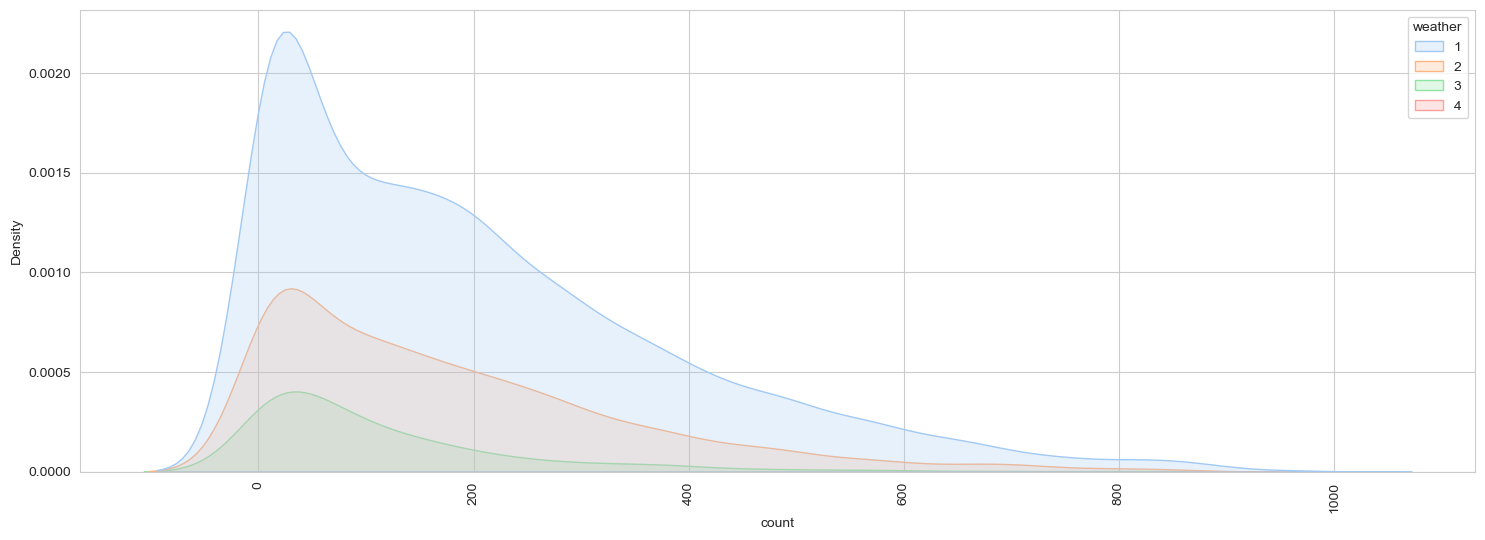

In [22]:
plt.figure(figsize=(18, 6))  
sns.kdeplot(x='count', hue='weather', data=df, fill=True)
plt.xticks(rotation=90)
plt.show()

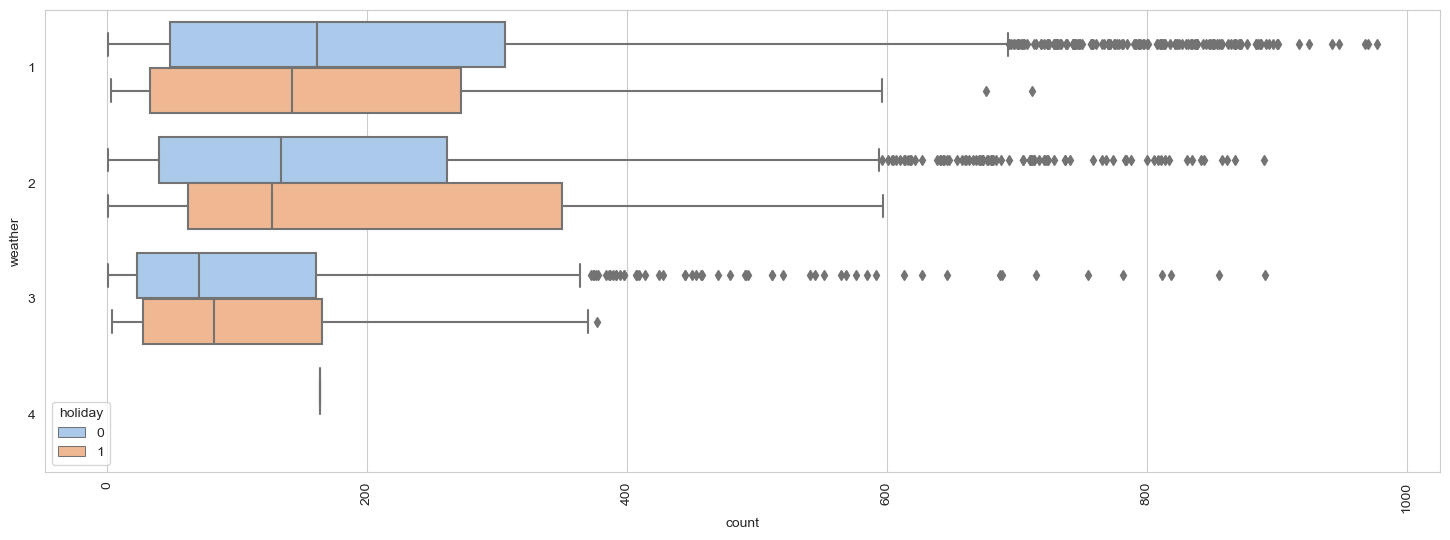

In [23]:
plt.figure(figsize=(18, 6))  
sns.boxplot(x='count', y='weather', hue='holiday', data=df)
plt.xticks(rotation=90)
plt.show()

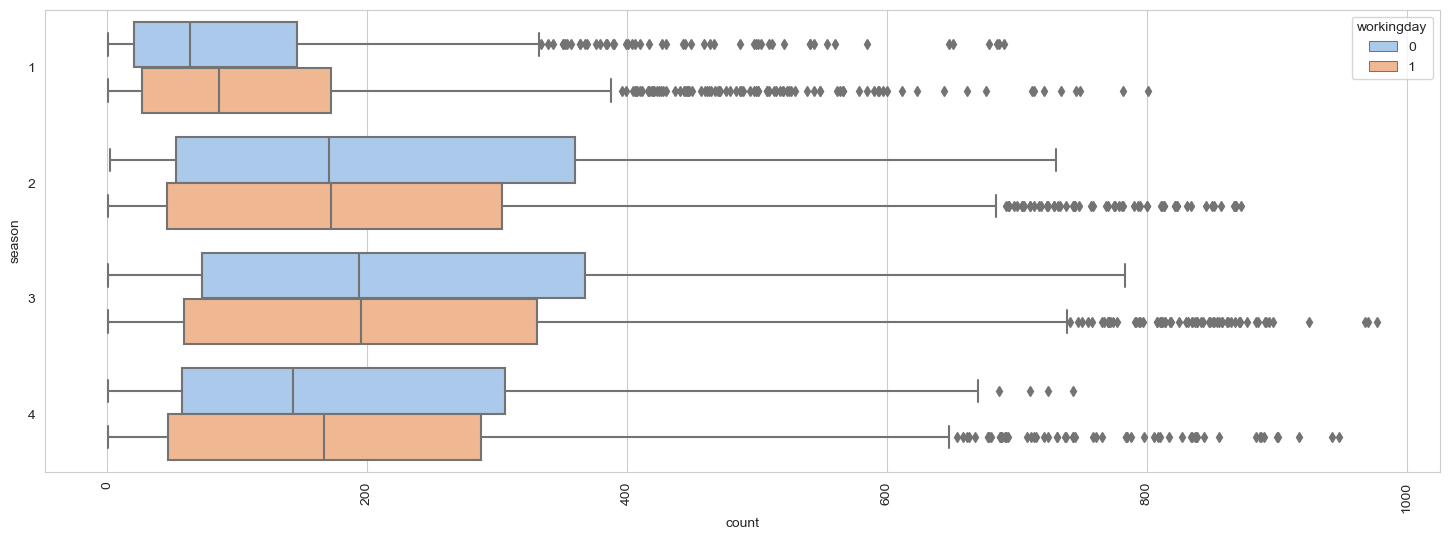

In [24]:
plt.figure(figsize=(18, 6))  
sns.boxplot(x='count', y='season', hue='workingday', data=df)
plt.xticks(rotation=90)
plt.show()

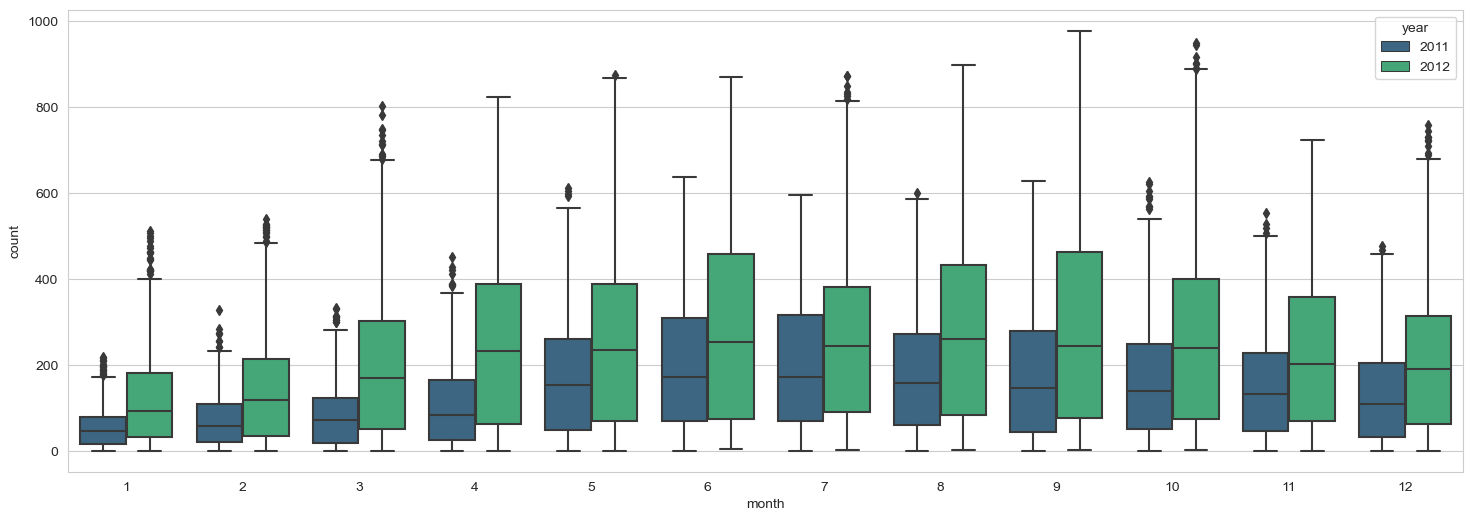

In [25]:
plt.figure(figsize=(18, 6))  
sns.boxplot(y='count', x='month', hue='year', data=df, palette='viridis')
# plt.xticks(rotation=90)
plt.show()

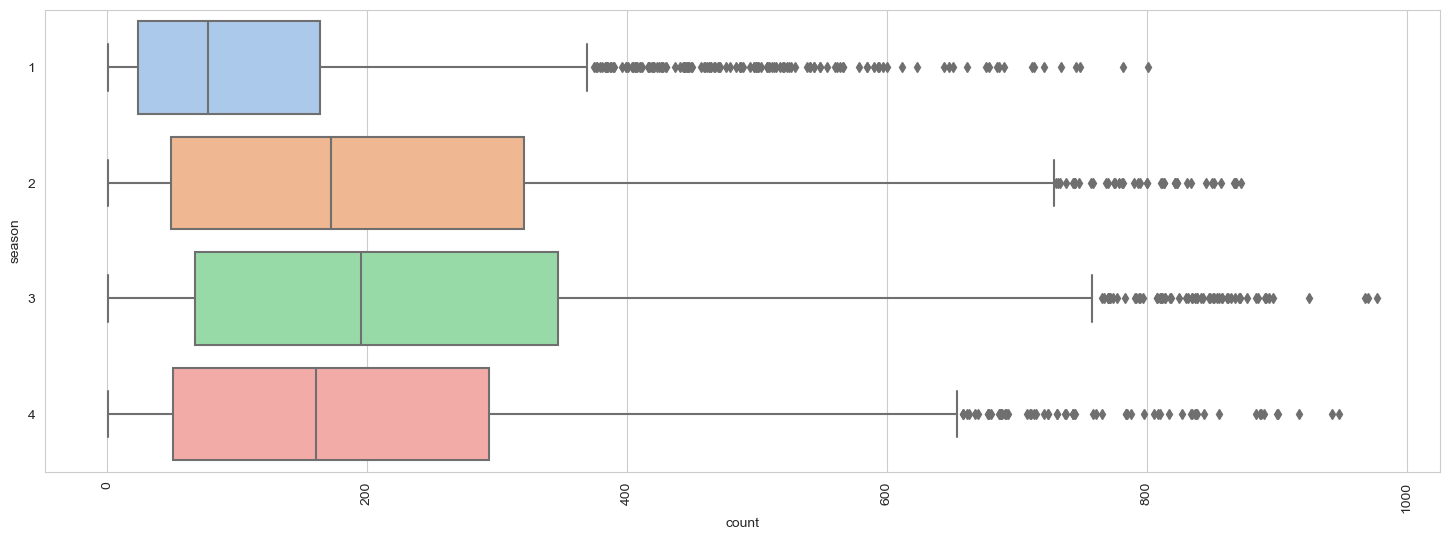

In [26]:
plt.figure(figsize=(18, 6))  
sns.boxplot(x='count', y='season', data=df)
plt.xticks(rotation=90)
plt.show()

# ***Hypothesis Testing***
---

## **1. Whether working day has an effect on number of electric cycles rented**

**Setup Null and Alternate Hypothesis**

*H0: Working Day has no effect on number of cycles rented*

*Ha: Working Day has an effect on number of cycles rented*

In [27]:
# outlier treatment
q1 = df['count'].quantile(0.25)
q3 = df['count'].quantile(0.75)
iqr = q3-q1
new_df = df[(df['count']> q1-iqr)&(df['count']<q3+iqr)][['workingday', 'count']].copy()
new_df.sample(10)

workingday  count
6091           1     13
1258           1     51
6706           1    258
1110           1     28
2853           1    365
8379           1    272
4794           0    132
10164          1    161
9535           1    459
8804           1     41

In [28]:
# working_day = new_df[new_df.workingday==1][['workingday', 'count']].sample(int(len(new_df[new_df.workingday==1])*0.66))
# non_working_day = new_df[new_df.workingday==0][['workingday', 'count']].sample(int(len(new_df[new_df.workingday==1])*0.33))

In [29]:
working_day = new_df[new_df.workingday==1]['count'].sample(100)
non_working_day = new_df[new_df.workingday==0]['count'].sample(100)

**Verify Asumptions**

1. Independence
2. Normality
3. Homogeneity of Variances

The two samples working_day and non_working_day are independent

**Normality Test**

In [30]:
from statsmodels.api import qqplot

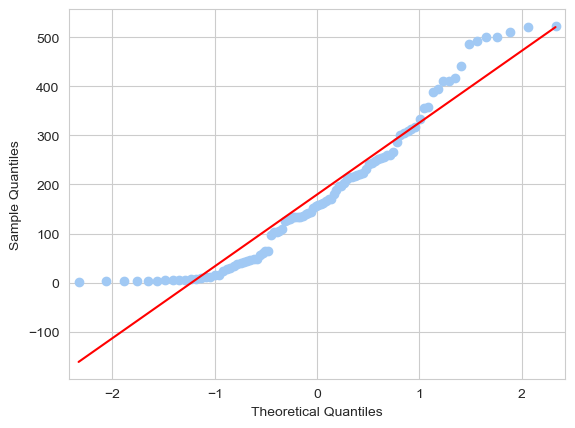

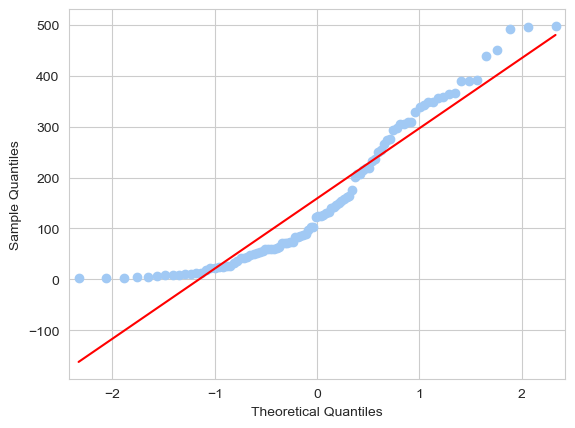

In [31]:
qqplot(working_day, line='s')
plt.show()
qqplot(non_working_day, line='s')
plt.show()

In [32]:
# boxcox transformation
from scipy.stats import boxcox

In [33]:
t_working_day = boxcox(working_day)[0]
t_non_working_day = boxcox(non_working_day)[0]

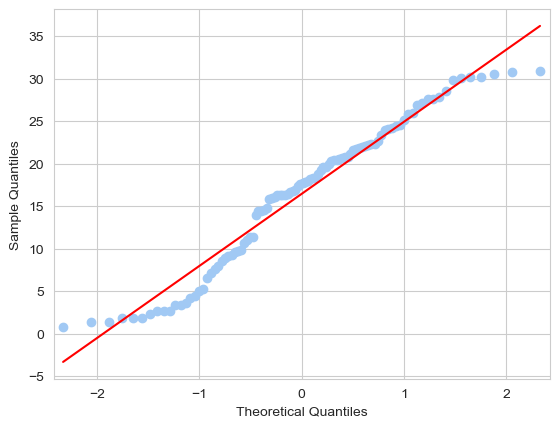

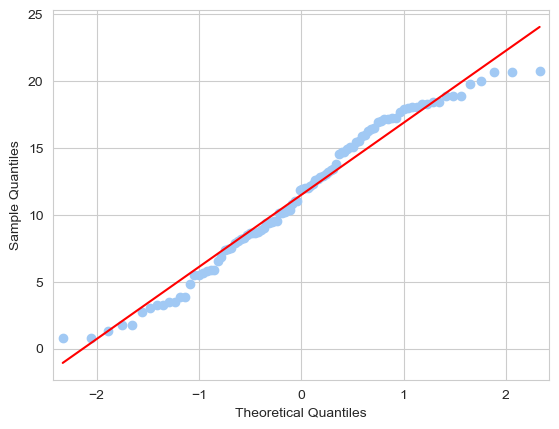

In [34]:
qqplot(t_working_day, line='s')
plt.show()
qqplot(t_non_working_day, line='s')
plt.show()

**Homogeneity of Variance**

In [35]:
t_working_day.var()/t_non_working_day.var()

2.476625374062052

Since the ratio of the larger variance to the smaller variance is less than 4. We can do the ttest

**Ttest of two samples**

In [36]:
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(t_working_day, t_non_working_day, alternative = 'greater')
print('t_stat: ', t_stat, 'p_value: ', p_value)
if p_value < 0.05:
    print('Reject Null Hypothesis')
else:
    print('Fail to reject Null Hypothesis')

t_stat:  4.898981235471868 p_value:  9.991495069352022e-07
Reject Null Hypothesis


***Observations***

* The Null Hypothesis that working day has no effect on renting bikes is *Rejected*.
* We conclude that Working day *has an effect* on number of bikes rented.

## **2. Whether no of cycles rented are similar or different across seasons**

* **Null Hypothesis ( H0 )** - Mean of cycle rented per hour is same for season 1,2,3 and 4.

* **Alternate Hypothesis ( HA )** -Mean of cycle rented per hour is not same for season 1,2,3 and 4.

In [37]:
# outlier treatment
q1 = df['count'].quantile(0.25)
q3 = df['count'].quantile(0.75)
iqr = q3-q1
season_df = df[(df['count']> q1-iqr)&(df['count']<q3+iqr)][['season', 'count']].copy()
season_df.sample(10)

season  count
3899       3    187
8538       3      3
10176      4    197
10527      4     11
3372       3    113
5597       1     57
3868       3     24
1283       1    280
6885       2     29
6230       1    211

In [38]:
s1 = season_df[season_df['season']==1]['count'].sample(100)
s2 = season_df[season_df['season']==2]['count'].sample(100)
s3 = season_df[season_df['season']==3]['count'].sample(100)
s4 = season_df[season_df['season']==4]['count'].sample(100)

**Verifying Assumptions of ANOVA**

1. Normality
2. Independence of Observations
3. Homogeneity of Variances

**Normality**

In [39]:
from statsmodels.api import qqplot

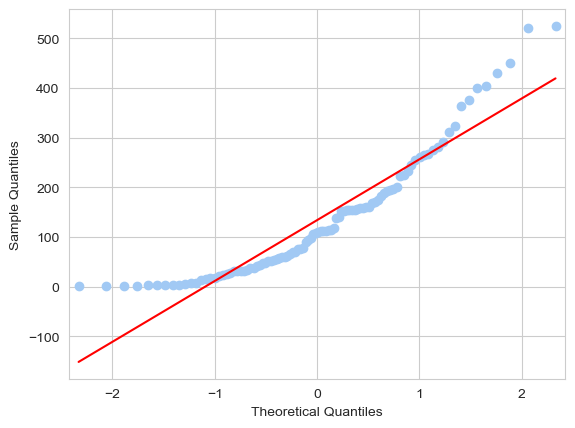

--------------------------------------------------


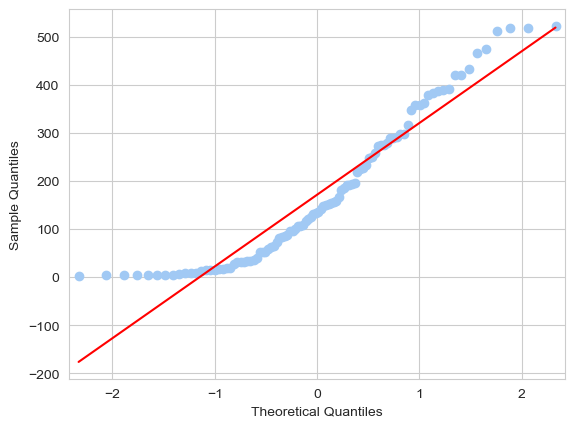

--------------------------------------------------


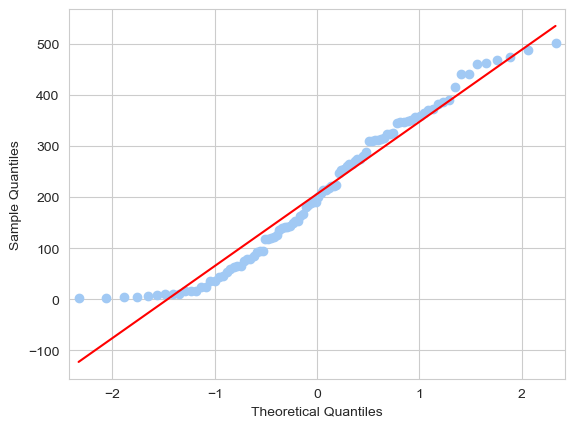

--------------------------------------------------


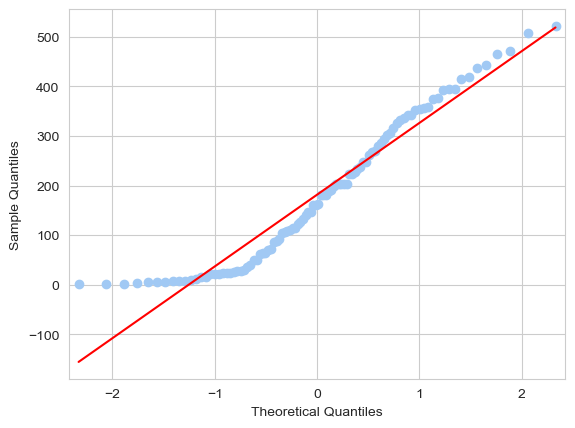

--------------------------------------------------


In [40]:
seasons = [s1, s2, s3, s4]
for i in seasons:
    qqplot(i, line='s')
    # sns.kdeplot(i, fill=True)
    plt.show()
    print('-'*50)

Shapiro Test

In [41]:
from scipy.stats import shapiro

In [42]:
s1_subset = s1.sample(100)
s2_subset = s2.sample(100)
s3_subset = s3.sample(100)
s4_subset = s4.sample(100)

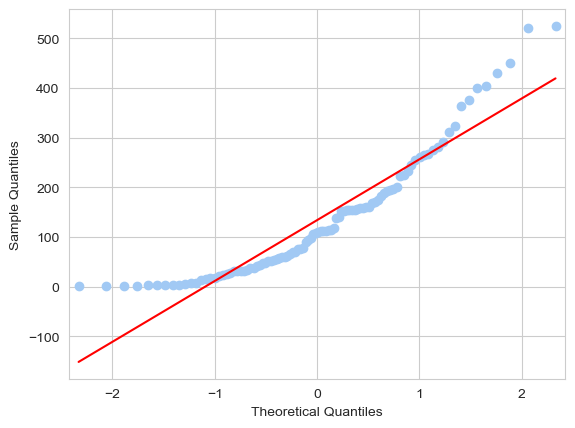

--------------------------------------------------


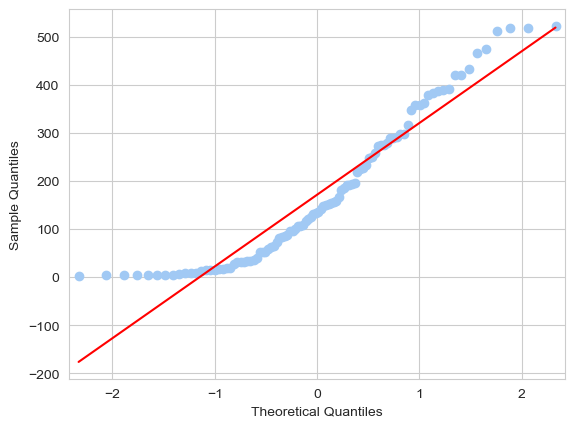

--------------------------------------------------


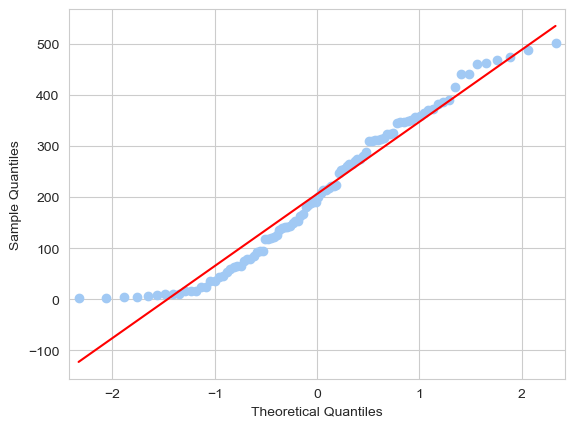

--------------------------------------------------


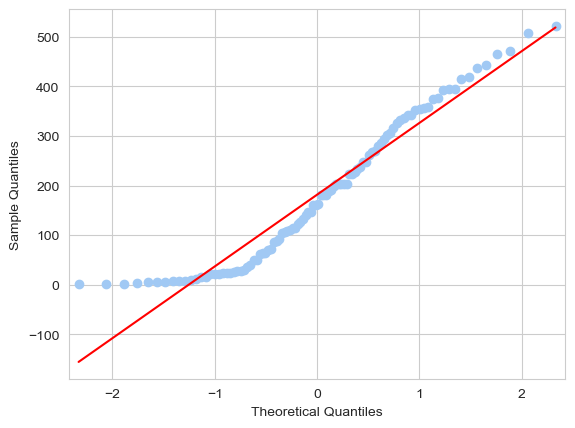

--------------------------------------------------


In [43]:
season_subset = [s1_subset, s2_subset, s3_subset, s4_subset]
for i in seasons:
    qqplot(i, line='s')
    # sns.kdeplot(i, fill=True)
    plt.show()
    print('-'*50)

In [44]:
print("season1" ,shapiro(s1))
print("season2" ,shapiro(s2))
print("season3" ,shapiro(s3))
print("season4" ,shapiro(s4))

season1 ShapiroResult(statistic=0.8787961602210999, pvalue=1.6145372683240566e-07)
season2 ShapiroResult(statistic=0.9020500183105469, pvalue=1.767429807841836e-06)
season3 ShapiroResult(statistic=0.9515076279640198, pvalue=0.0010441313497722149)
season4 ShapiroResult(statistic=0.9275819063186646, pvalue=3.6382181860972196e-05)


Boxcox

In [45]:
from scipy.stats import boxcox

In [46]:
t_s1 = boxcox(s1)[0]
t_s2 = boxcox(s2)[0]
t_s3 = boxcox(s3)[0]
t_s4 = boxcox(s4)[0]

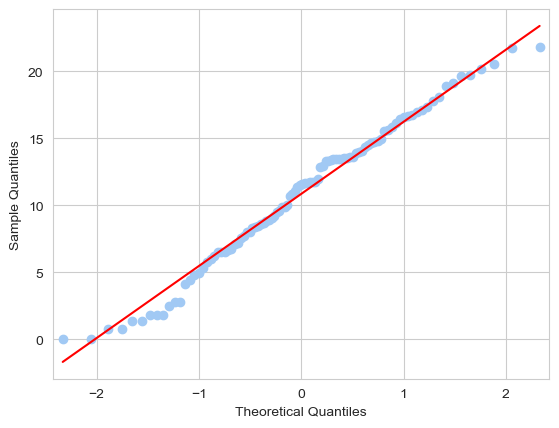

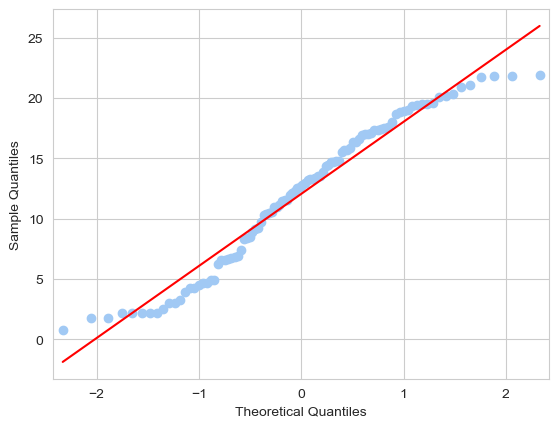

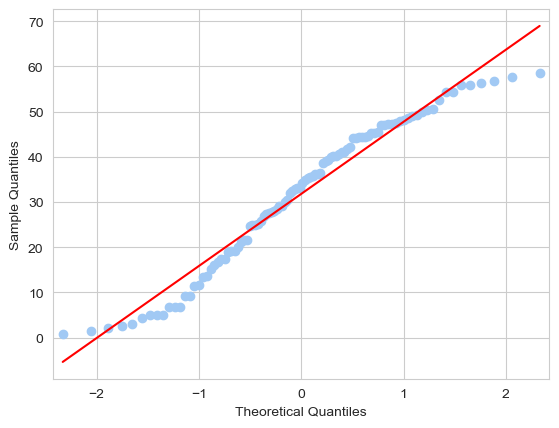

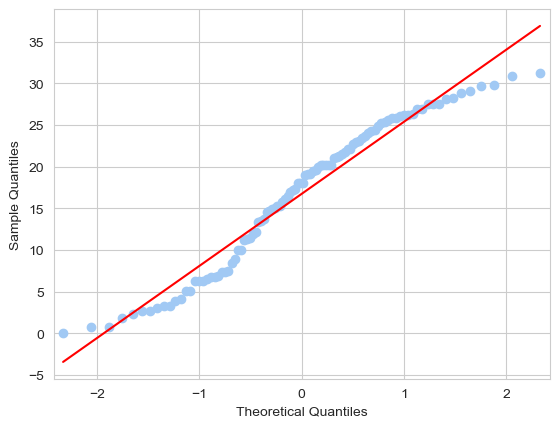

In [47]:
qqplot(t_s1, line='s')
plt.show()
qqplot(t_s2, line='s')
plt.show()
qqplot(t_s3, line='s')
plt.show()
qqplot(t_s4, line='s')
plt.show()

**Homogeneity Of Variance**

In [48]:
from scipy.stats import levene

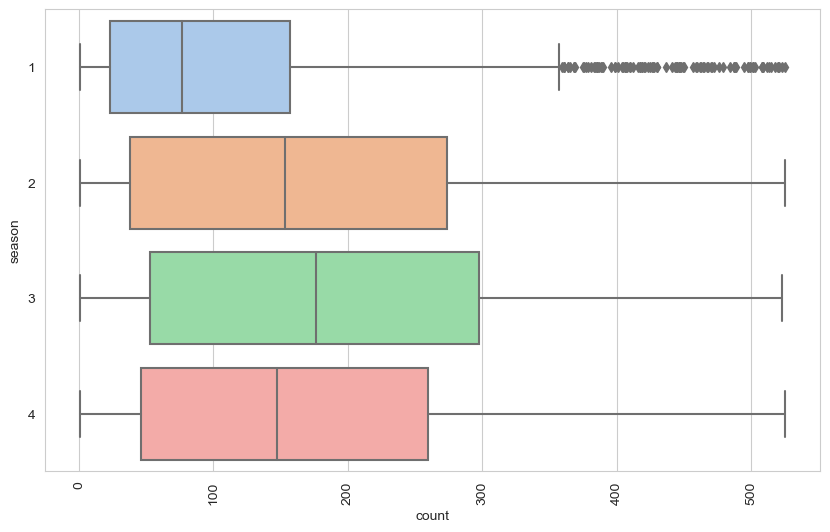

In [49]:
plt.figure(figsize=(10, 6))  
sns.boxplot(x='count', y='season', data=season_df)
plt.xticks(rotation=90)
plt.show()

In [50]:
_, pvalue = levene(t_s1, t_s2, t_s3, t_s4)
if pvalue < 0.05:
    print("Reject H0")
    print("Variances are different")
else:
    print("Fail to reject H0")
    print("Variances are not different")

Reject H0
Variances are different


Since assumptions of ANOVA are violated we'll use a non parametric test - Kruskal-Wallis Test

**Kruskal Test**

In [51]:
from scipy.stats import kruskal

fvalue, pvalue = kruskal(t_s1, t_s2, t_s3, t_s4)
if pvalue < 0.05:
    print("Reject Null Hypothesis")
else:
    print("fail to reject Null Hypothesis")

Reject Null Hypothesis


**Observations**

* The Null Hypothesis that mean of bikes rented across seasons is *Rejected*.
* We can conclude that Season *has an effect* on number of bikes rented.


In [52]:
# from scipy.stats import f_oneway

# fvalue, pvalue = f_oneway(t_s1, t_s2, t_s3, t_s4)
# if pvalue < 0.05:
#     print("Reject Null Hypothesis")
# else:
#     ("fail to reject Null Hypothesis")

## **3. Whether number of cycles rented similar or different in different weather**

* **Null Hypothesis ( H0 )** - Mean of cycle rented per hour is same for weather 1, 2 and 3. (* We wont be considering weather 4 as there in only 1 data point for weather 4 and we cannot perform a ANOVA test with a single data point for a group.)

* **Alternate Hypothesis ( HA )** -Mean of cycle rented per hour is same for season 1,2,3 and 4 are different.

In [53]:
# outlier treatment
q1 = df['count'].quantile(0.25)
q3 = df['count'].quantile(0.75)
iqr = q3-q1
weather_df = df[(df['count']> q1-iqr)&(df['count']<q3+iqr)][['weather', 'count']].copy()
weather_df.sample(10)

weather  count
3609       1    342
4290       2    336
7216       3     13
7174       1    461
5660       1     28
4689       1    147
3341       1      3
9629       1    400
8317       1    220
7209       2    505

In [54]:
w1 = weather_df[weather_df['weather']==1]['count'].sample(100)
w2 = weather_df[weather_df['weather']==2]['count'].sample(100)
w3 = weather_df[(weather_df['weather']==3) | (weather_df['weather']==4)]['count'].sample(100)
# Since weather 4 has very few samples we'll combine it with weather 4

**Normality Test**

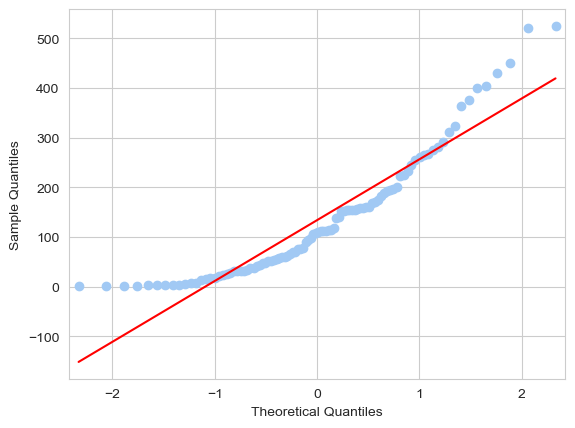

--------------------------------------------------


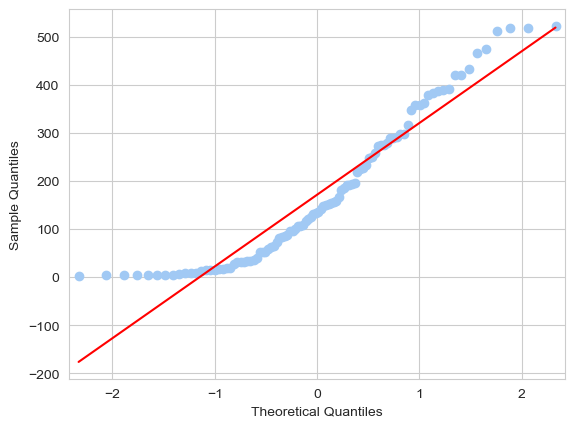

--------------------------------------------------


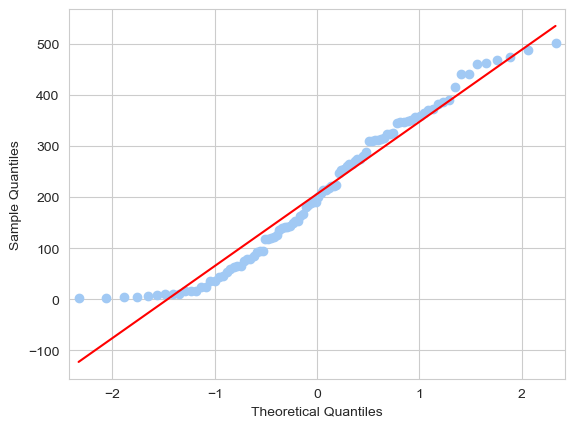

--------------------------------------------------


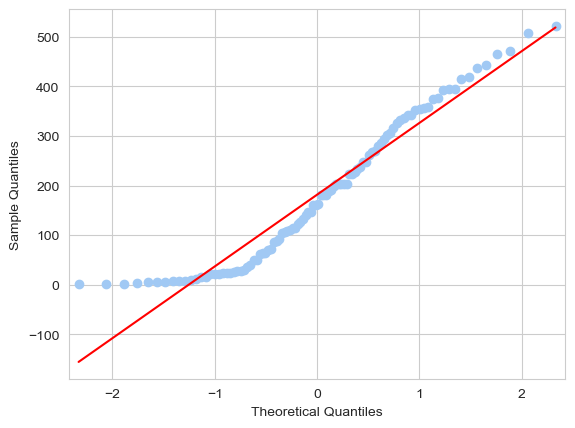

--------------------------------------------------


In [55]:
weather = [w1, w2, w3]
for i in season_subset:
    qqplot(i, line='s')
    # sns.kdeplot(i, fill=True)
    plt.show()
    print('-'*50)

Boxcox

In [56]:
t_w1 = boxcox(s1_subset)[0]
t_w2 = boxcox(s2_subset)[0]
t_w3 = boxcox(s3_subset)[0]

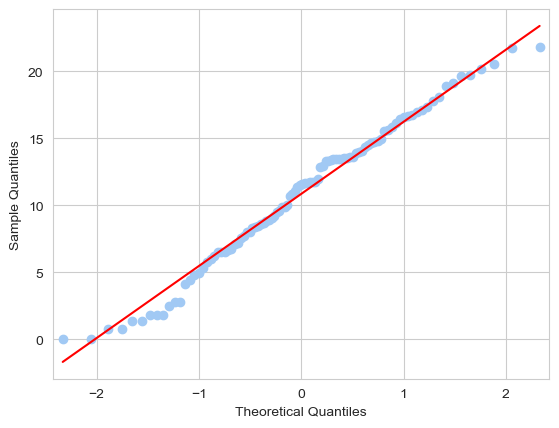

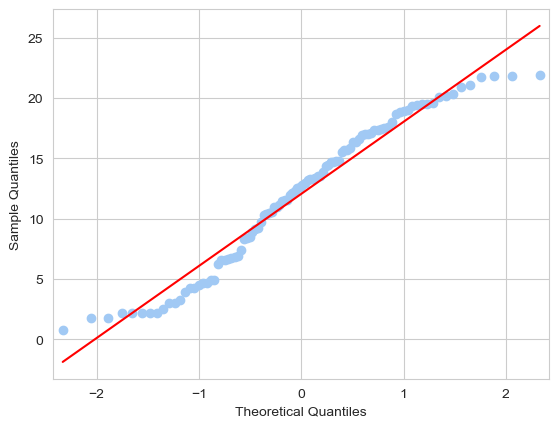

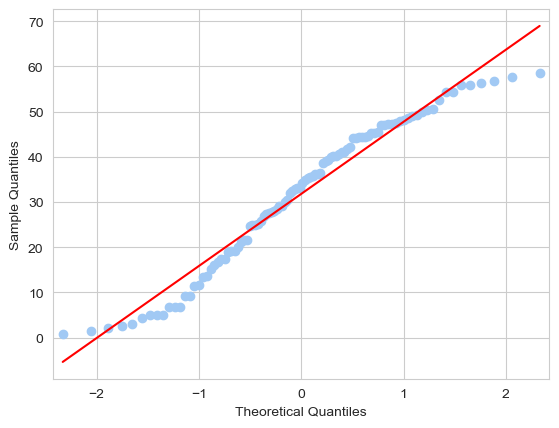

In [57]:
qqplot(t_s1, line='s')
plt.show()
qqplot(t_s2, line='s')
plt.show()
qqplot(t_s3, line='s')
plt.show()

**Homogeneity of Variance**

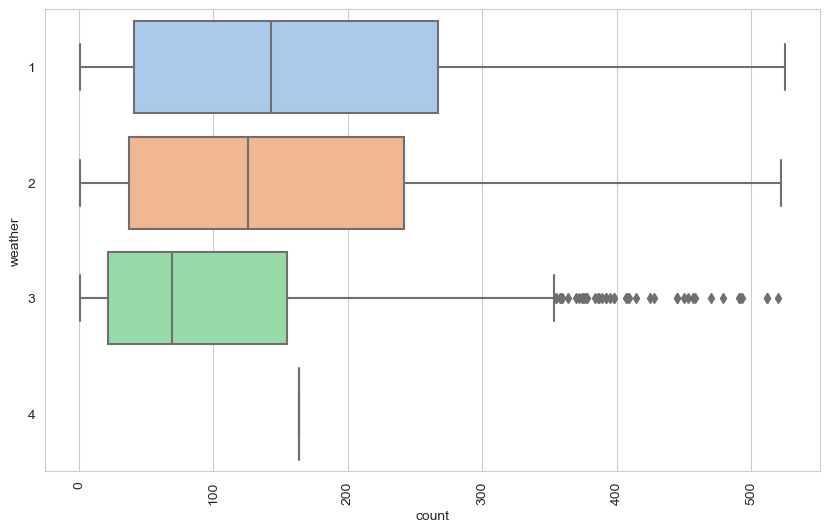

In [58]:
plt.figure(figsize=(10, 6))  
sns.boxplot(x='count', y='weather', data=weather_df)
plt.xticks(rotation=90)
plt.show()

In [59]:
# H0: Variances are similar
# Ha: Variances are not similar
_, pvalue = levene(t_w1, t_w2, t_w3)
if pvalue < 0.05:
    print("Reject H0")
    print("Variances are not similar")
else:
    print("Fail to reject H0")
    print("Variances are similar")

Reject H0
Variances are not similar


Since the assumptions of ANOVA are violated we'll use non-parametric test: Kruskal-Wallis Test

In [60]:
# fvalue, pvalue = f_oneway(t_w1, t_w2, t_w3)
# if pvalue < 0.05:
#     print("Reject Null Hypothesis")
# else:
#     ("fail to reject Null Hypothesis")

***Kruskal Test***

In [61]:
fvalue, pvalue = kruskal(t_w1, t_w2, t_w3)
if pvalue < 0.05:
    print("Reject Null Hypothesis")
else:
    print("fail to reject Null Hypothesis")

Reject Null Hypothesis


**Observations**

* The Null Hypothesis that mean of bikes rented in different weather is same is *Rejected*.
* We can conclude that weather *has an effect* on number of bikes rented.

## **4. Weather is dependent on season**

* **Null Hypothesis ( H0 )** - weather is independent of season

* **Alternate Hypothesis ( HA )** -weather is dependent of seasons.

In [62]:
w_s = pd.crosstab(df['weather'], df['season'])
w_s

season      1     2     3     4
weather                        
1        1759  1801  1930  1702
2         715   708   604   807
3         211   224   199   225
4           1     0     0     0

In [63]:
w_s_values = [w_s.iloc[0][0:4].values, w_s.iloc[1][0:4].values, w_s.iloc[2][0:4].values]
w_s_values

[array([1759, 1801, 1930, 1702], dtype=int64),
 array([715, 708, 604, 807], dtype=int64),
 array([211, 224, 199, 225], dtype=int64)]

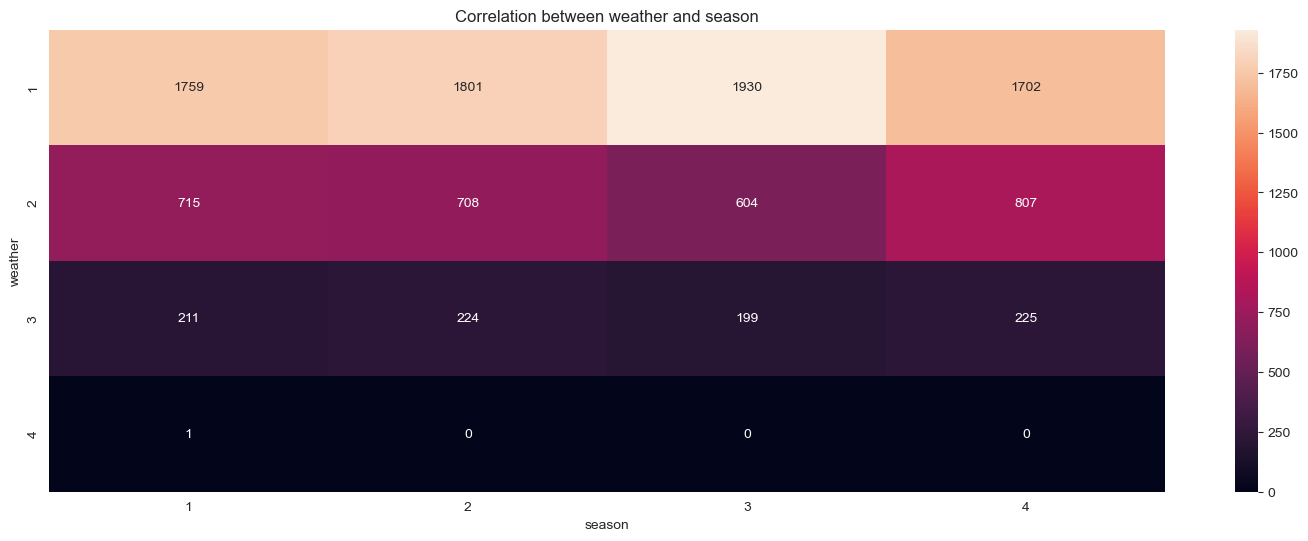

In [64]:
plt.figure(figsize=(18,6))
sns.heatmap(w_s, annot=True, fmt='.6g')
plt.title('Correlation between weather and season')
plt.show()

In [65]:
from scipy.stats import chi2_contingency

In [66]:
_, p_value, _, _ = chi2_contingency(w_s_values)
if p_value < 0.05:
    print("Reject Null Hypothesis")
    print("Weather is dependent on season")
else:
    print("Fail to reject Null Hypothesis")
    print("Weather is independent of seasons")


Reject Null Hypothesis
Weather is dependent on season


**Observations**

* The Null Hypothesis that weather is independent of season is *Rejected*.
* We can conclude that weather is *dependent* on which season it is.

# ***Observations and Conclusions:***

---


1.   **Season** - Count of rented bikes are maximum in season 3 and minimum in season 1
2.   **Weather** - Count of rented bikes are maximum in weather 1 and falls sharply in weather 3 and 4.
3. **Temperature** - Count of rented bikes are very low at lower temperatures and rises with increase in temperature.
4. **Time of day** - Count of cycle rent falls steeply through the night and attains peak during the day.
5. Humidity, windspeed, temperature and weather are correlated with season and impacts the count of cycles rented.
6. Cycles rented on working and non-working days are similar in number.
7. Casual Cycles rented on Weekends are higher than Registered cycles rented on weekends.
8. Registered cycles rented on working days are higher than casual cycles rented on working days.




## ***Recommendations:***

---

1. The EDA suggests that count of cycle rented is very low during season 1. **Yulu can rollout some challenges during this season, like New year goals on fitness and roll out exciting prizes for people participating in this season**.

2. The count of cycle is very low during the night hours. **Yulu can introduce some safety features in its app and also some promotional discounts for people renting yulu bikes from 12am - 6am**, which can motivate people to ride Yulu bikes during this time frame.

3. The count of bikes rented on holidays are significantly lower than on non-holidays. **Yulu can set up bike centers near entertainment hotspots, like malls and amusemennt parks to hike up its rental count on weekends and holidays.**

4. The EDA proves that Temperature, humidity, windspeed and weather - all these environmental factors affect the count of bikes rented on Yulu. Even though Yulu can not change the weather conditions, **Yulu can offer reduced pricing for people renting in these weather conditions (weather 2 & 3).**

5. Yulu can introduce exclusive benifits for registered users to get more users to register, which can pull up the amount of cycles rented per hour.

6. Yulu can introduce some early biker scheme (4am -7am), **that would target the people who are motivated in physical fitness and also roll out some exciting prizes for people covering the longest distance rides**.
